In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris.data, iris.target], columns=iris.feature_names + ['class'])
iris_df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0


In [3]:
print(iris_df['class'].dtype)
iris_df['class'] = iris_df['class'].astype('int32')
print(iris_df['class'].dtype)
iris_df.head(2)

float64
int32


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


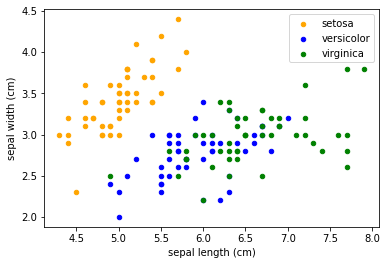

In [4]:
fig = iris_df[iris_df['class']==0].plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', label=iris.target_names[0], color='orange')
iris_df[iris_df['class']==1].plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', label=iris.target_names[1], color='blue', ax=fig)
iris_df[iris_df['class']==2].plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', label=iris.target_names[2], color='green', ax=fig)

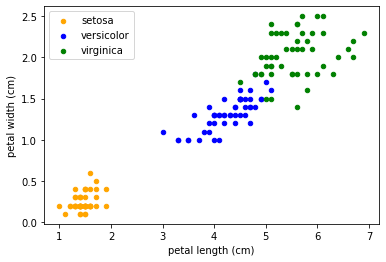

In [5]:
fig = iris_df[iris_df['class']==0].plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', label=iris.target_names[0], color='orange')
iris_df[iris_df['class']==1].plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', label=iris.target_names[1], color='blue', ax=fig)
iris_df[iris_df['class']==2].plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', label=iris.target_names[2], color='green', ax=fig)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0D23F748>,
      dtype=object)

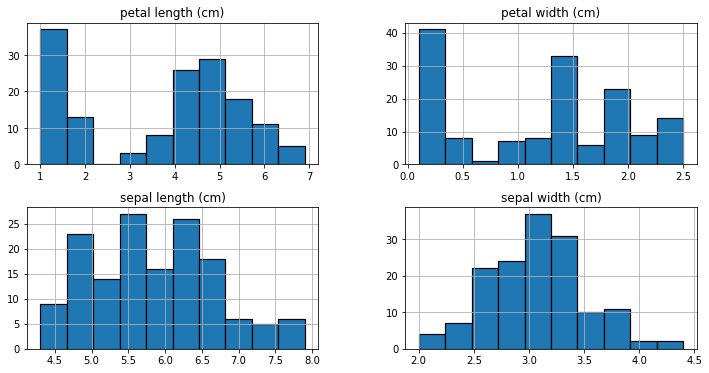

In [6]:
iris_df.iloc[:, 0:4].hist(edgecolor='black', linewidth=1.2, figsize=(12,6))

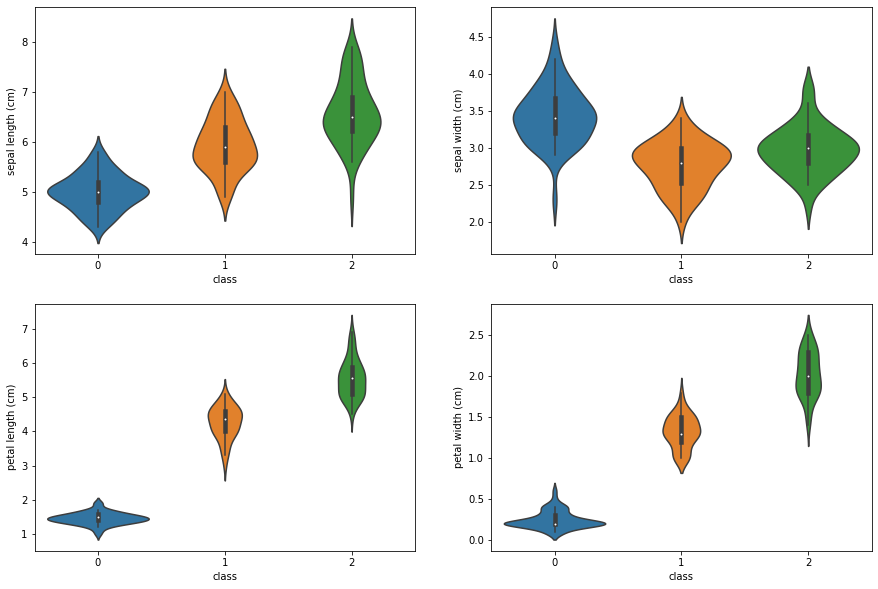

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x=iris_df['class'], y=iris_df['sepal length (cm)'])
plt.subplot(2,2,2)
sns.violinplot(x=iris_df['class'], y=iris_df['sepal width (cm)'])
plt.subplot(2,2,3)
sns.violinplot(x=iris_df['class'], y=iris_df['petal length (cm)'])
plt.subplot(2,2,4)
sns.violinplot(x=iris_df['class'], y=iris_df['petal width (cm)'])

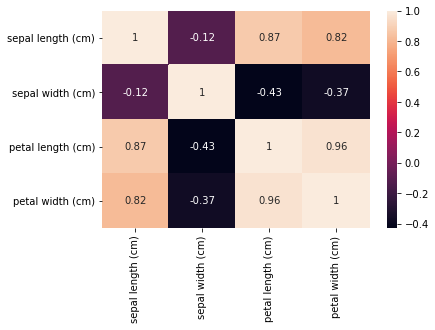

In [8]:
sns.heatmap(iris_df.iloc[:, 0:4].corr(), annot=True)

In [9]:
from sklearn.model_selection import train_test_split
x = iris_df.iloc[:, 0:4].values
y = iris_df.iloc[:, 4].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Support Vector Machine

In [10]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

[[ 5  0  0]
 [ 0 10  1]
 [ 0  4 10]]


0.8333333333333334

# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

[[ 5  0  0]
 [ 0 10  1]
 [ 0  3 11]]


0.8666666666666667

# Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

[[ 5  0  0]
 [ 0 10  1]
 [ 0  4 10]]


0.8333333333333334

# K-Nearest Neighbours

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

[[ 5  0  0]
 [ 0 10  1]
 [ 0  1 13]]


0.9333333333333333